# Correlation Regression Tests

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test Correlations in the Hammersley Generator
---
The Hammerlsey sequence should produce random numbers on (0,1) that are less correlated than the basic random generator:

Covariance of Hammersley samples:
[[ 8.33224805e-02 -3.68343309e-04 -6.68187387e-05  4.25010191e-04]
 [-3.68343309e-04  8.33878181e-02  7.56326104e-05  2.25221076e-04]
 [-6.68187387e-05  7.56326104e-05  8.34060346e-02  4.12948253e-04]
 [ 4.25010191e-04  2.25221076e-04  4.12948253e-04  8.32500833e-02]]


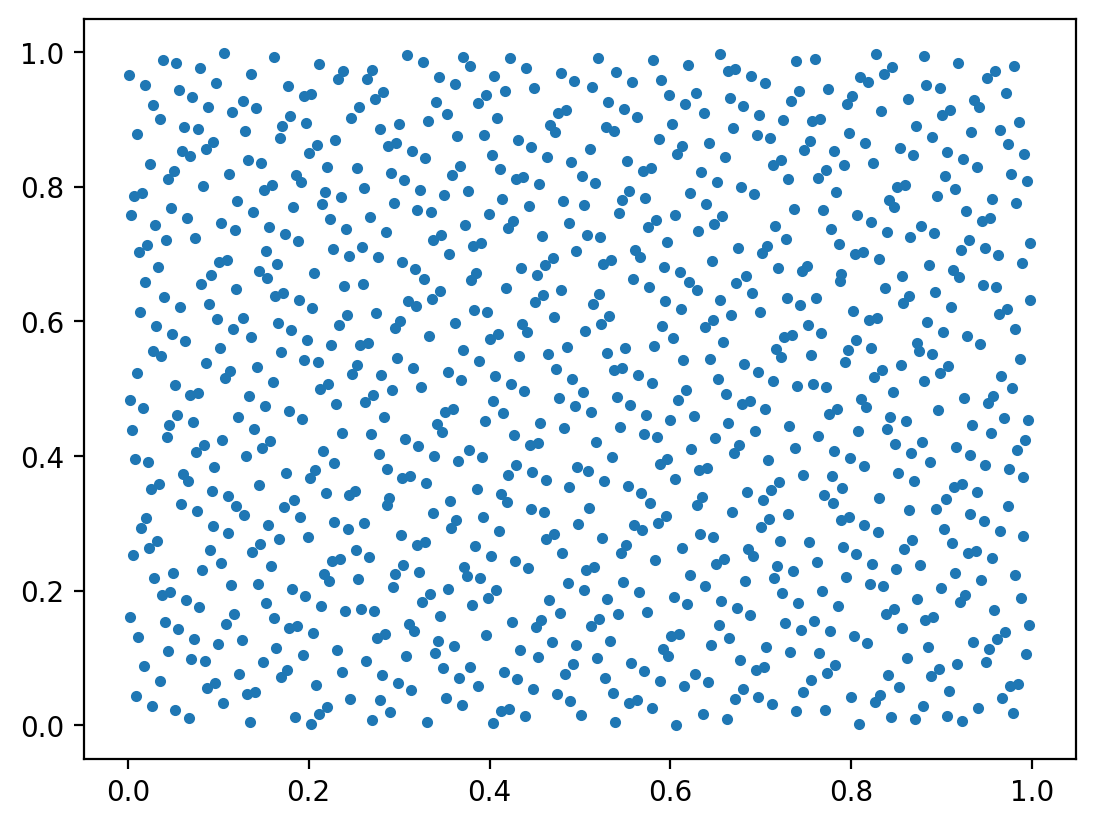

In [2]:
from distgen.dist import random_generator

rands = random_generator((4,1000), sequence='hammersley')
cov = np.cov(rands)

print('Covariance of Hammersley samples:')
print(cov)
plt.plot(rands[0,:], rands[1,:],'.');



Covariance of Rand samples:
[[ 0.08397055 -0.00413052  0.00054263 -0.0023141 ]
 [-0.00413052  0.07862232 -0.00123086 -0.0056482 ]
 [ 0.00054263 -0.00123086  0.08107273  0.00095155]
 [-0.0023141  -0.0056482   0.00095155  0.07819306]]


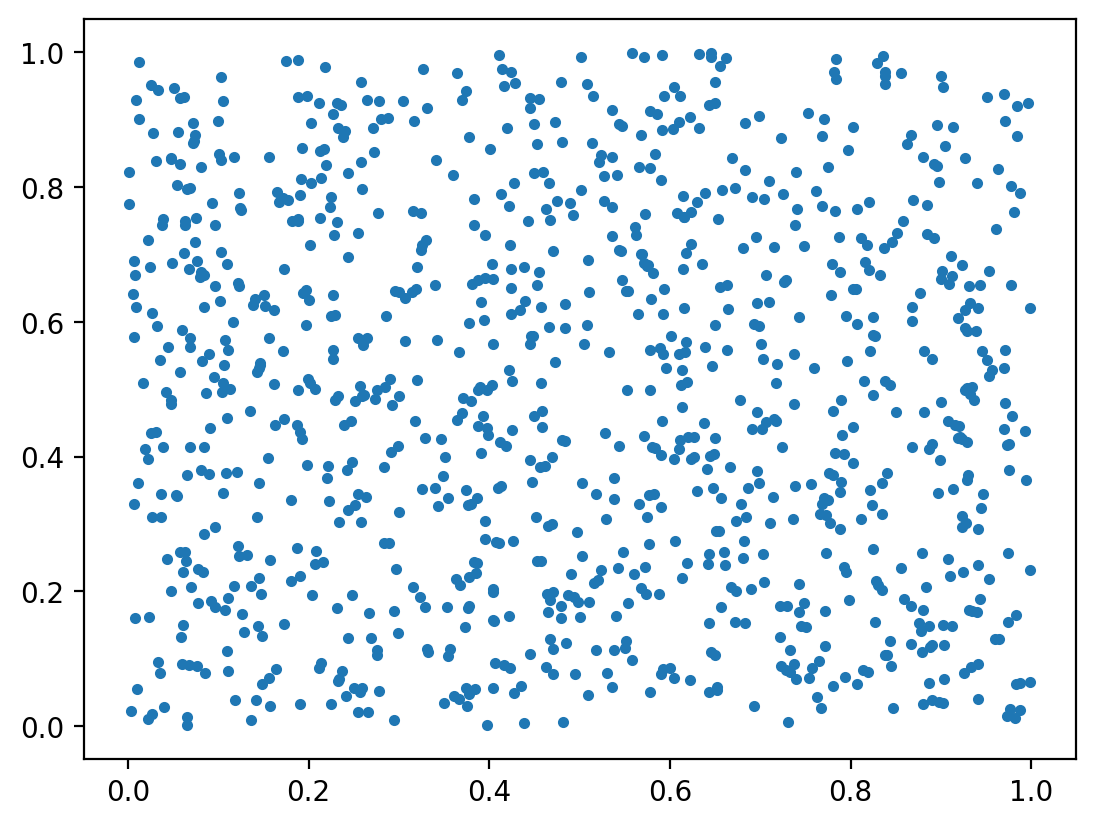

In [3]:

rands = random_generator((4,1000), sequence='pseudo')
cov = np.cov(rands)
print('Covariance of Rand samples:')
print(cov)
plt.plot(rands[0,:], rands[1,:], '.')

# Radial Distributions
---
# Test correlation in sin(theta)cos(theta)

In [4]:
import math
rands = random_generator((2,10000), sequence='hammersley')
np.sum( np.cos(2*math.pi)*rands[1,:] * np.sin(2*math.pi)*rands[1,:])

np.float64(-8.163903819533452e-13)

In [5]:
rands = random_generator((2,10000), sequence='pseudo')
np.sum( np.cos(2*math.pi)*rands[1,:] * np.sin(2*math.pi)*rands[1,:])

np.float64(-8.145291228696796e-13)

# Generate x,y for uniform dist and check correlation


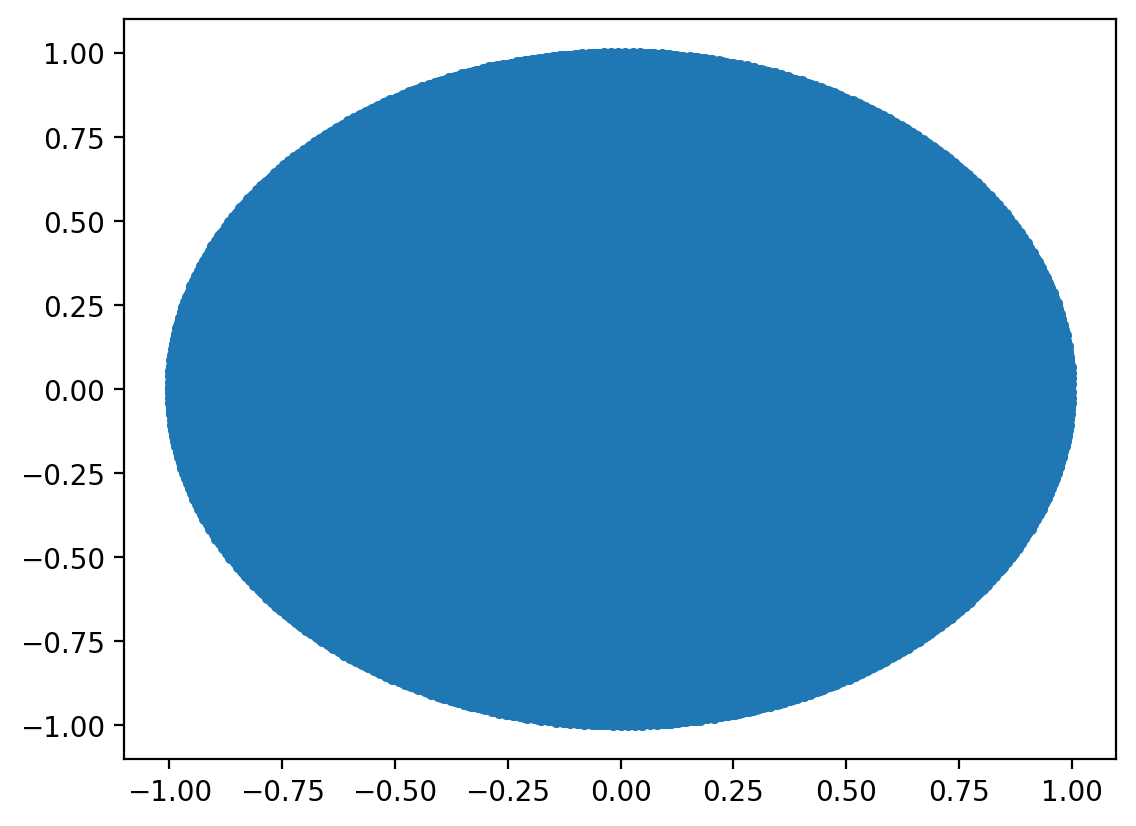

In [6]:
R = 1
N=100000

rands1 = random_generator((2,N), sequence='hammersley')
rands2 = random_generator((2,N), sequence='pseudo')
rands3 = np.linspace(0, 1, N)

rs = R*np.sqrt(rands1[0,:]) 

xs1 = rs*np.cos(2*math.pi*rands1[1,:])
ys1 = rs*np.sin(2*math.pi*rands1[1,:])

xs2 = rs*np.cos(2*math.pi*rands2[1,:])
ys2 = rs*np.sin(2*math.pi*rands2[1,:])

xs3 = rs*np.cos(2*math.pi*rands3)
ys3 = rs*np.sin(2*math.pi*rands3)

plt.plot(xs1,ys1,'.');

In [7]:
print( np.mean( (xs1-xs1.mean())*(ys1-ys1.mean())) )
print( np.mean( (xs2-xs2.mean())*(ys2-ys2.mean())) )
print( np.mean( (xs3-xs3.mean())*(ys3-ys3.mean())) )

-9.407807239115584e-07
0.0004341195682481792
-9.40046825031402e-07


In [8]:
sigma=np.cov(rands1)
v,V = np.linalg.eig(sigma)

#np.matmul(np.matmul(V.T, sigma), V) 

randsp = np.matmul(V.T, rands1)

np.cov(randsp)
rs = R*np.sqrt(randsp[0,:]) 

xsp = rs*np.cos(2*math.pi*randsp[1,:])
ysp = rs*np.sin(2*math.pi*randsp[1,:])
print(np.mean( (xsp-xsp.mean())*(ysp-ysp.mean())))

0.008920000391873446


In [9]:
input_str="""
n_particle: 100000
species: electron
random_type: hammersley
total_charge:
  value: 1
  units: pC
start:
  type: time
r_dist:
  max_r:
    units: m
    value: 2
  min_r:
    units: m
    value: 0
  type: radial_uniform
"""

import yaml

yaml.safe_load(input_str)

{'n_particle': 100000,
 'species': 'electron',
 'random_type': 'hammersley',
 'total_charge': {'value': 1, 'units': 'pC'},
 'start': {'type': 'time'},
 'r_dist': {'max_r': {'units': 'm', 'value': 2},
  'min_r': {'units': 'm', 'value': 0},
  'type': 'radial_uniform'}}

In [10]:
from distgen import Generator
gen = Generator(input_str)
gen.run()
xs = gen.particles['x']
ys = gen.particles['y']

gen.particles.cov('x','y')

array([[ 1.00001000e+00, -3.76331398e-06],
       [-3.76331398e-06,  1.00001000e+00]])